Epoch 1/30
200/200 [==============================] - 1s 1ms/step - loss: 1.2887 - mse: 1.2887
Epoch 2/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1665 - mse: 0.1665
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535
Epoch 4/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 6/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 8/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 9/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 10/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 11/30
200/200 [============================

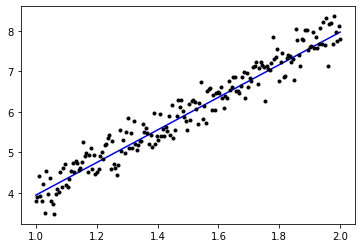

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 가상적인 데이터 생성
X = data = np.linspace(1,2,200) # 시작값=1, 종료값=2, 개수=200
y = X*4 + np.random.randn(200) * 0.3 # x를 4배로 하고 편차 0.3정도의 가우시안 잡음추가

# 아래 4줄은 매우 중요
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.fit(X, y, batch_size=1, epochs=30)

predict = model.predict(data)
plt.plot(data, predict, 'b', data, y, 'k.') # 첫 번째 그래프는 파란색 마커로
plt.show() # 두 번째 그래프는 검정색 .으로 그린다.

In [ ]:
# XOR은 input이 2개(x1, x2), Output은 1개 (O->y)
# 아래 예제는 한층을 더 추가한 경우

import tensorflow as tf
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]]) # 첫번째 Layer이므로 Input을 정해줘야 함 -> 활성화 함수(sigmoid)를 정해줘야 함
y = np.array([[0],[1],[1],[0]])
model = tf.keras.models.Sequential() # Sequential모델에서는 dense를 만들어서 하나씩 추가 / dense는 Layer

# 둘다 sigmoid 함수를 사용 (활성화 함수)
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd) # compile 해줘야 함
model.fit(X, y, batch_size=1, epochs=1000)
print(model.predict(X))

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 4ms/step - loss: 0.2560
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2558
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2557
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2556
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2555
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2553
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2553
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 13/1000
4/4 [==============================] - 0s 4ms/st

In [ ]:
# MLP를 사용한 MNIST 숫자인식
# NIST에서 정리함 (데이터 사이즈도 풍부하고, 라벨링도 철저하게 제공하는 데이터셋)

import tensorflow as tf
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수 (데이터 크기가 크기 때문에)
num_classes = 10 # 출력 클래스의 개수
epochs = 20 # 에포크의 개수

# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 입력 이미지를 2차원에서 1차원 벡터로 변경한다.
# 숫자가 28 * 28 로 이루어져 픽셀 하나하나가 rgb 색상이 들어가 있음
# 하나하나의 색깔이 0~255 사이의 숫자로 이루어짐 -> 신경망에 2차원으로 들어가면 안됨 (Input 데이터는 쫙 펴진 상태여야 함)
# Input 데이터는 행렬 자체로 있으면 안되고, 1행 2행처럼 납작하게 Flattern 데이터여야 함(= 일렬로 줄을 서야 함/1차원)
# 28 * 28 = 784 -> 우리가 만든 신경망에서 이런 모든 784개가 제공되어야 함
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다.
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 신경망의 모델을 구축한다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))
model.summary()
sgd = tf.keras.optimizers.SGD(lr=0.1)

# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다.
model.compile(loss='mean_squared_error',
optimizer=sgd,
metrics=['accuracy'])

# 학습을 수행한다.
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs)

# 학습을 평가한다.
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0897 - accuracy: 0.2394
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0841 - accuracy: 0.3922
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0784 - accuracy: 0.4966
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.07